In [8]:
from lectura import ldata
import networkx as nx
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

In [3]:
datosapms=ldata('tc01_data/yeast_AP-MS.txt')
datoslit=ldata('tc01_data/yeast_LIT.txt')
datosy2h=ldata('tc01_data/yeast_Y2H.txt')

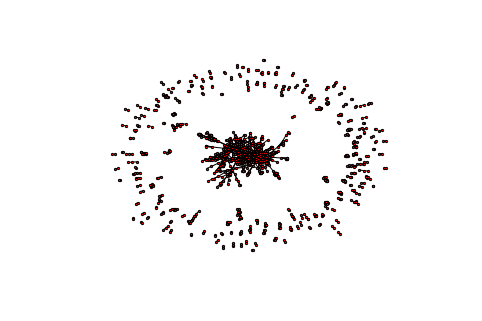

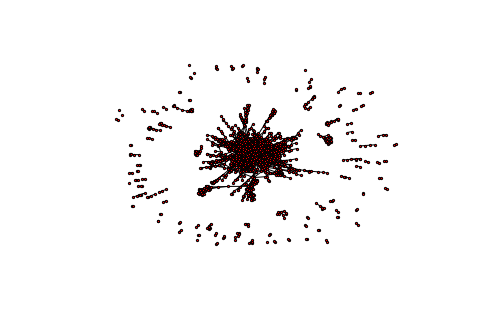

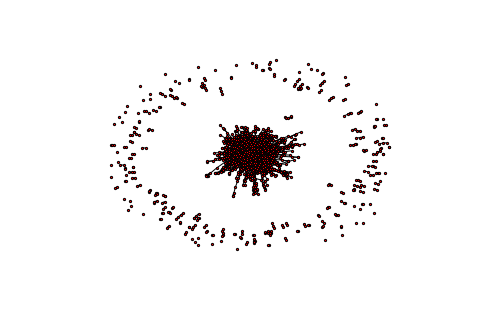

In [4]:
G1 = nx.Graph()#directed
G2=nx.Graph()
G3=nx.Graph()


G1.add_edges_from(datosapms)
G2.add_edges_from(datoslit)
G3.add_edges_from(datosy2h)

nx.draw(G1, with_labels=False, node_size=5)

plt.show()
nx.draw(G2, with_labels=False, node_size=5)

plt.show()
nx.draw(G3, with_labels=False, node_size=5)

plt.show()

In [55]:
nodos=[G1.number_of_nodes(),G2.number_of_nodes(),G3.number_of_nodes()]
enlaces=[G1.number_of_edges(),G2.number_of_edges(),G3.number_of_edges()]
dirigido=["no","no","no"]
kmean = [np.mean(list(dict(G1.degree).values())),np.mean(list(dict(G2.degree).values())),
         np.mean(list(dict(G3.degree).values()))]
kmin = [np.min(list(dict(G1.degree).values())),np.min(list(dict(G2.degree).values())),
         np.min(list(dict(G3.degree).values()))]
kmax = [np.max(list(dict(G1.degree).values())),np.max(list(dict(G2.degree).values())),
         np.max(list(dict(G3.degree).values()))]

densidad = [nx.density(G1),nx.density(G2),nx.density(G3)]
clusteringglobal = [nx.transitivity(G1),nx.transitivity(G2),nx.transitivity(G3)]
clusteringlocal = [nx.average_clustering(G1),nx.average_clustering(G2),nx.average_clustering(G3)]
diametro = [nx.diameter(max(nx.connected_component_subgraphs(G1), key=len)),
            nx.diameter(max(nx.connected_component_subgraphs(G2), key=len)),
            nx.diameter(max(nx.connected_component_subgraphs(G3), key=len))]

In [50]:
giant=max(nx.connected_component_subgraphs(G1), key=len)
print (nx.diameter(giant))

15


In [56]:
info = pd.DataFrame({"ID":['apms','lit','y2h'],"nodos":nodos,"enlaces":enlaces,"dirigido":dirigido,"kmean":kmean,
                    "kmin":kmin,"kmax":kmax,"densidad":densidad,"clusteringglobal":clusteringglobal,
                    "clusteringlocal":clusteringlocal,"diametro":diametro})

In [57]:
info

,ID,clusteringglobal,clusteringlocal,densidad,diametro,dirigido,enlaces,kmax,kmean,kmin,nodos
0,apms,0.618590,0.554636,0.006899,15,no,9070,127,11.183724,1,1622
1,lit,0.346193,0.292492,0.002481,19,no,2925,40,3.808594,1,1536
2,y2h,0.023614,0.046194,0.001440,14,no,2930,91,2.903865,1,2018


In [ ]:
## Ejercicio 2

In [17]:
delfines = nx.read_gml('/home/invitado1/Escritorio/TP1/tc01_data/dolphins.gml')

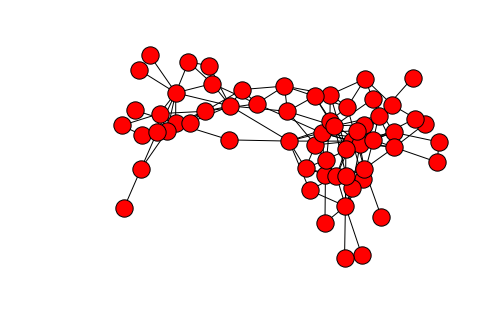

In [19]:
nx.draw(delfines)#, with_labels=True)

plt.show()

In [18]:
delfines.node

NodeView(('Whitetip', 'SN96', 'Hook', 'Vau', 'DN16', 'Fish', 'Double', 'SN89', 'SN4', 'SN100', 'TSN83', 'Mus', 'MN105', 'Zap', 'DN21', 'TR77', 'Five', 'TR120', 'Haecksel', 'Quasi', 'Shmuddel', 'Patchback', 'Grin', 'SN9', 'Web', 'SMN5', 'Beak', 'Scabs', 'Fork', 'Thumper', 'Knit', 'Wave', 'MN23', 'Trigger', 'Kringel', 'MN60', 'Notch', 'MN83', 'TR82', 'Bumper', 'TSN103', 'Stripes', 'Upbang', 'Number1', 'Oscar', 'PL', 'Jet', 'Topless', 'Cross', 'SN63', 'TR88', 'DN63', 'Zig', 'Beescratch', 'TR99', 'Ripplefluke', 'CCL', 'Gallatin', 'SN90', 'Zipfel', 'Feather', 'Jonah'))

In [20]:
generos=ldata('tc01_data/dolphinsGender.txt')


In [21]:
print(generos)

[['Five', 'f'], ['Cross', 'm'], ['SMN5', 'm'], ['MN83', 'm'], ['Trigger', 'f'], ['Patchback', 'm'], ['Vau', 'f'], ['Fork', 'm'], ['TR120', 'f'], ['MN105', 'm'], ['Haecksel', 'm'], ['MN60', 'm'], ['Stripes', 'f'], ['Jonah', 'm'], ['TSN103', 'f'], ['Topless', 'm'], ['Scabs', 'f'], ['TR99', 'f'], ['Shmuddel', 'f'], ['TSN83', 'NA'], ['Grin', 'm'], ['Zap', 'NA'], ['SN9', 'f'], ['SN4', 'f'], ['SN63', 'f'], ['Hook', 'f'], ['Whitetip', 'f'], ['Kringel', 'f'], ['Zipfel', 'm'], ['SN89', 'f'], ['SN100', 'f'], ['Double', 'f'], ['CCL', 'f'], ['Thumper', 'm'], ['Beak', 'm'], ['Fish', 'f'], ['Oscar', 'm'], ['TR77', 'f'], ['SN96', 'm'], ['Bumper', 'm'], ['PL', 'm'], ['TR82', 'NA'], ['DN16', 'f'], ['Web', 'm'], ['SN90', 'm'], ['Beescratch', 'm'], ['Wave', 'f'], ['Feather', 'm'], ['Gallatin', 'm'], ['Upbang', 'm'], ['DN63', 'm'], ['DN21', 'm'], ['Jet', 'm'], ['Number1', 'm'], ['Knit', 'm'], ['Zig', 'm'], ['Ripplefluke', 'NA'], ['MN23', 'm'], ['Quasi', 'm'], ['Mus', 'm'], ['Notch', 'm'], ['TR88', 'f']]


In [24]:
for delfin in generos:
    delfines.node[delfin[0]]["genero"]=delfin[1]

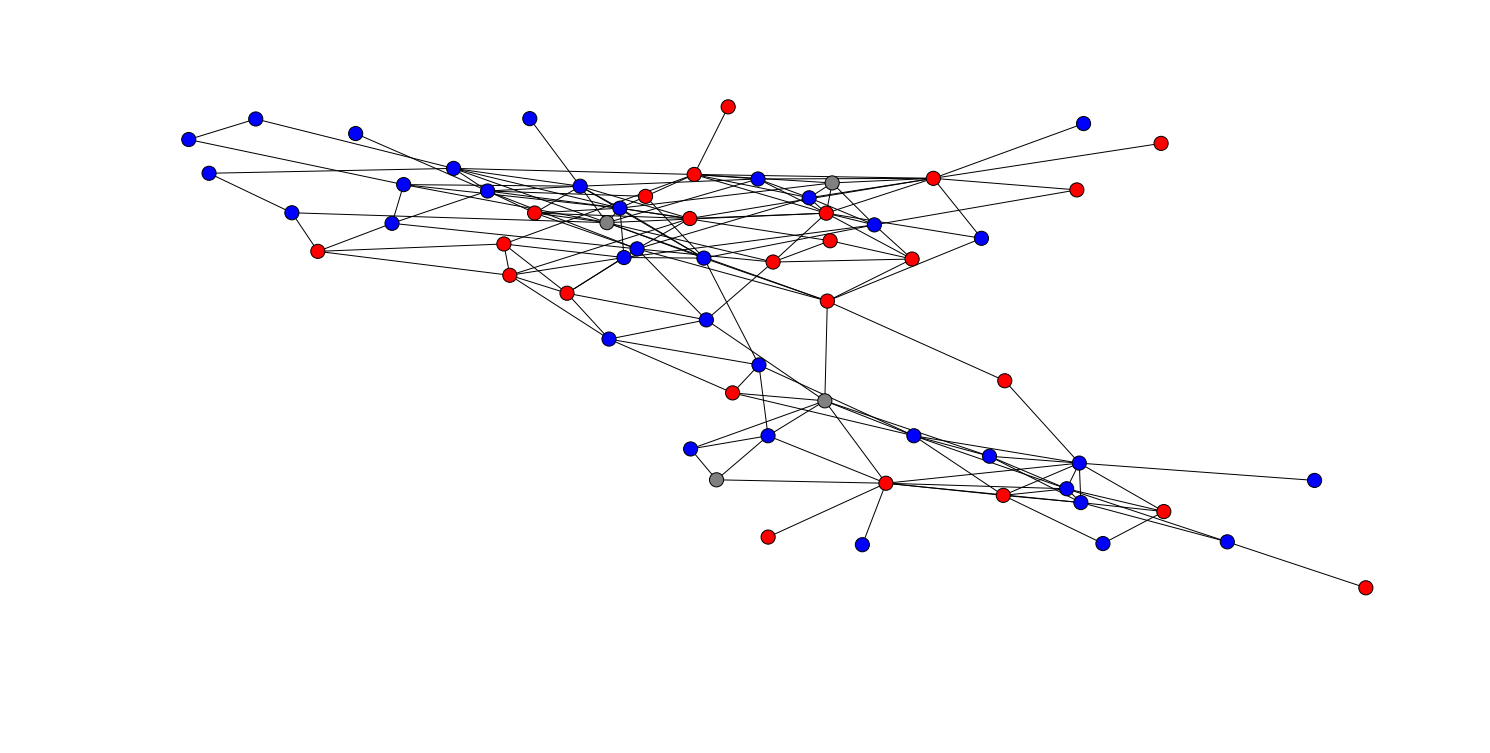

In [61]:
plt.figure(figsize=(20,10))
nx.draw(delfines, 
        width=1, 
        node_color=["blue" if g=="m" else "red" if g=="f" else "grey"  for g in nx.get_node_attributes(delfines, "genero").values()], 
        node_size=200,
        with_labels=False,
       pos=nx.fruchterman_reingold_layout(delfines)
       )
plt.show()

In [99]:
sexos=dict(delfines.node.data("genero"))
test=delfines
for i in range(10):
    for delfin,genero in zip(test,np.random.permutation(list(sexos.values()))):
        test.node[delfin]["genero"]=genero
    